In [1]:
# La fonction 'espace' permettra un affichage plus lisible de certaines fonctions venant par la suite.

In [2]:
def espace() :
    print()
    print()
    print()
    
    return None

In [3]:
# On importe les éléments nécéssaires à l'aléatoire, aux calculs et aux grilles.

In [4]:
import random
import math
import numpy as np

%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import matplotlib.pyplot as plt
from matplotlib import animation

In [5]:
# Dans la liste "liste_travail", on réparti les emplois entre hommes et machines.

# Les emplois occupés par des hommes sont représentés par des 'Homme' et les emplois occupés par des robos sont
# représentés par des 'Robot'.

# On décalre pour l'instant que un robot peut remplacer jusqu'à 3 hommes dans le secteur industriel.

In [6]:
liste_industrie = ['','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']

In [7]:
def remplissage_homme (liste_travail) :
    '''list[str] -> list[str]'''
    
    # i : int
    i = 0
    
    for i in range(len(liste_travail)) :
        liste_travail[i] = 'Homme'
        
    return liste_travail

In [8]:
liste_industrie_1 = remplissage_homme(liste_industrie)
print(liste_industrie_1)

['Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme']


In [9]:
def remplacement_homme (liste_travail, proba_remplacement, remplace_nombre) :
    '''list[str] * float * int -> list[str]'''
    
    # i : int
    i = 0
    
    # j : int
    j = 0
    
    # r : float
    r = 0.0
    
    while (i < len(liste_travail)) :
        
        r = random.randint(0,100) / 100
        
        
        if ((r < proba_remplacement) and (liste_travail[i] != '---')):
            
            for j in range (-(remplace_nombre)//2, (remplace_nombre)//2 + 1) :
                
                if (j < len(liste_travail)) :
                    
                    if j != 0 :
                    
                        liste_travail[j+i] = '---'
                    
                    else :
                    
                        liste_travail[j+i] = 'Robot'
                    
            i = i + remplace_nombre // 2 + 1
            
        else :
            
            i = i + 1
    
    return liste_travail

In [10]:
liste_industrie_2 = remplacement_homme(liste_industrie_1,0.20,4)
print(liste_industrie_2)

# Cette fonction possede un probleme majeur puisqu'elle ne se print pas des fois et elle s'actualise alors que
# elle ne devrait pas le faire.

['Homme', '---', '---', 'Robot', '---', '---', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', '---', '---', 'Robot', '---', '---', 'Homme', 'Homme', 'Homme', 'Homme', 'Homme', '---', '---', 'Robot', '---', '---', 'Homme']


In [11]:
# Intéressons nous désormais à une modélisation du remplacement humain en usine mais utilisant une grille (grid).

# Il faut choisir un nombre de lignes et de colonnes en respectant certaines conditions citées plus bas.

# Ces conditions permettent un affichage correct de la grille.

In [12]:
# On respecte que : lignes <= 25

# On respecte que : colonnes <= 15

In [13]:
# arr = np.empty((lignes, colonnes), dtype=str)

In [14]:
def creation_remplissage_grid_hommes (lignes_grid, colonnes_grid) :
    """grid * int -> grid"""
    
    grid = np.empty((lignes_grid, colonnes_grid), dtype=str)
    
    for i in range(lignes_grid) :
        grid[i] = 'H'
        
    return grid

In [15]:
def compte_emplois (grid ,lignes_grid ,colonnes_grid ) :
    
    # i : int
    i = 0
    # j : int
    j = 0
    # c_r : int
    c_r = 0
    # c_h : int
    c_h = 0
    # c_e : int
    c_e = 0
    
    for i in range(lignes_grid) :
        for j in range(colonnes_grid) :
            if (grid[i][j] != ' ') :
                c_e = c_e + 1
            if (grid[i][j] == 'H') :
                c_h = c_h + 1
            if (grid[i][j] == 'R') :
                c_r = c_r + 1
                
    return ('Emplois total',c_e,'Emplois hommes',c_h,'Emplois robots',c_r)

In [16]:
def répartition_emplois (grid, lignes_grid, colonnes_grid) :
    
    a,b,c,d,e,f = compte_emplois(grid ,lignes_grid ,colonnes_grid)
    
    return ('Répartition Hommes',d/b,'Répartition Robots',f/b)

In [17]:
def fluctuation_emplois (grid1 , grid2, lignes_grid, colonnes_grid) :
    
    a,b,c,d,e,f = compte_emplois(grid2 ,lignes_grid, colonnes_grid)
    
    g,h,i,j,k,l = compte_emplois(grid1 ,lignes_grid, colonnes_grid)
    
    f_t = h - b
    
    f_h = j - d
    
    f_r = l - f
    
    return('Fluctuation Emplois Total',f_t,'Fluctuation Emplois Hommes',f_h,'Fluctuation Emplois Robots',f_r)

In [18]:
# Commencent à partir d'ici les fonctions en représentation à grid.

In [19]:
def rplcmt_homme_usine_grille (grid, lignes_grid, colonnes_grid, proba_rplcmt) :
    
    # i : int
    i = 0
    
    # j : int
    j = 0
    
    # r : int
    r = 0
    
    while (i < lignes_grid) :
        
        while (j < colonnes_grid) :
            
            r = 100 - random.randint(0,100)
            
            if (r < proba_rplcmt) :
                
                # i2 : int
                i2 = 0
                # j2 : int
                j2 = 0
                
                for i2 in range(i-1,i+2) :
                    
                    for j2 in range(j-1,j+2) :
                        
                        if ((i2 >= 0) and (i2 < lignes_grid) and (j2 >= 0) and (j2 < colonnes_grid)) :
                            
                            if ((j2 == j) and (i2 == i)) :
                                
                                grid[i2][j2] = 'R'
                                
                            if (grid[i2][j2] != 'R') :
                                
                                grid[i2][j2] = ' '
                                
                i = i + 1
                
            j = j + 1
            
        i = i + 1
        
        j = 0
            
    return grid.copy()

In [20]:
lignes = 25
colonnes = 15
proba_remplace = 15

grid_usine_1_0 = creation_remplissage_grid_hommes(lignes,colonnes)
grid_usine_1_1 = rplcmt_homme_usine_grille(grid_usine_1_0,lignes,colonnes,proba_remplace)
print(grid_usine_1_1)

[['H' 'H' 'H' 'H' 'H' 'H' ' ' 'R' ' ' 'H' ' ' ' ' ' ' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'H' ' ' 'R' ' ' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' ' ' 'R' ' ' 'H' 'H' ' ' ' ' ' ' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'H' 'H' ' ' 'R' ' ' 'H']
 ['H' ' ' ' ' ' ' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'H']
 ['H' ' ' 'R' ' ' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'H' 'H' 'H']
 ['H' ' ' ' ' ' ' 'H' 'H' 'H' 'H' 'H' ' ' 'R' ' ' ' ' ' ' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'R' ' ' ' ']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' 'R' ' ']
 [' ' ' ' ' ' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ']
 [' ' 'R' ' ' 'H' 'H' 'H' ' ' ' ' ' ' 'H' 'H' 'H' 'H' 'H' 'H']
 [' ' ' ' ' ' 'H' 'H' 'H' ' ' 'R' ' ' ' ' ' ' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' ' ' 'R' ' ' ' ' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' ' 'R' ' ' 'H' '

In [21]:
# On crée désormais la variante de la fonction précédente mais sur un nombre 'n' d'années que l'on défini.

In [22]:
def rplcmt_homme_usine_grille_n_années (grid, lignes_grid, colonnes_grid, proba_rplcmt, n_années) :
    
    #grid_act = grid
    
    # list_grid : dict[int:np]
    dict_grid = dict()
    
    dict_grid[0] = grid
    
    for x in range(1,n_années+1) :
            
        dict_grid[x] = rplcmt_homme_usine_grille(dict_grid[x-1].copy(),lignes_grid,colonnes_grid,proba_rplcmt)
        
    return dict_grid

In [23]:
lignes = 25
colonnes = 15
proba_remplace = 10
nombre_années = 10

grid_usine_2_0 = creation_remplissage_grid_hommes(lignes, colonnes)
grid_usine_2_1 = rplcmt_homme_usine_grille_n_années(grid_usine_2_0, lignes, colonnes, proba_remplace, nombre_années)

for i in range(nombre_années+1) :
    print(grid_usine_2_1[i])
    print(
    
    )

[['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' '

In [24]:
# On s'intéresse désormais à la fluctuation du nombre d'emplois en général en usine, mais également au nombre
# d'emplois distribués aux robots et ceux distribués aux hommes.

In [25]:
# On crée alors l'équivalent de la fonction précédente mais en affichant certaines valeurs importantes (fluctuation).

In [26]:
def rplcmt_homme_usine_grille_n_années_print (list_grid, lignes_grid, colonnes_grid, proba_rplcmt, n_années) :
    
    # i : int
    i = 0
    
    for i in range(n_années + 1) :
        
        if (i == 0) :
            
            print('Etat initial')
            print(compte_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(répartition_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(list_grid[i])
            print()
            
        else :
            
            print('Année',i)
            print(compte_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(répartition_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(fluctuation_emplois(list_grid[i],list_grid[i-1],lignes,colonnes))
            print(list_grid[i])
            print()
            
    return None

In [48]:
lignes = 25
colonnes = 15
proba_remplace = 2
nombre_années = 25

grid_usine_3_0 = creation_remplissage_grid_hommes(lignes,colonnes)
grid_usine_3_1 = rplcmt_homme_usine_grille_n_années(grid_usine_3_0,lignes,colonnes,proba_remplace,nombre_années)
grid_usine_3_2 = rplcmt_homme_usine_grille_n_années_print(grid_usine_3_1,lignes,colonnes,proba_remplace,nombre_années)

Etat initial
('Emplois total', 375, 'Emplois hommes', 375, 'Emplois robots', 0)
('Répartition Hommes', 1.0, 'Répartition Robots', 0.0)
[['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 

In [28]:
# Hors, en prenant en compte le développement de nouvelles technologies et la réduction du cout moyen d'un robot,
# on estime que la probabilité de remplacement d'un homme par un robot augmente d'année en année, en fonction
# de la catégorie du pays étudié. On parlera des catégories de pays par la suite.

# On crée alors une nouvelle variante de la fonction de remplacement en grille pour 'n' années mais cette fois-ci,
# on introduit une variation, ici positive, de la probabilité de remplacement afin de représenter le développement
# continu dans le temps des robots.

In [29]:
def rplcmt_homme_usine_grille_n_années_dvlpmt_robots (grid, lignes_grid, colonnes_grid, proba_rplcmt, n_années, dev_robot) :
    
    #grid_act = grid
    
    # list_grid : dict[int:np]
    dict_grid = dict()
    
    dict_grid[0] = grid
    
    proba_remplacement = proba_rplcmt
    
    for x in range(1,n_années+1) :
            
        proba_remplacement = proba_remplacement + random.randint(0,dev_robot)
        dict_grid[x] = rplcmt_homme_usine_grille(dict_grid[x-1].copy(),lignes_grid,colonnes_grid,proba_rplcmt)
        
    return dict_grid

In [30]:
proba_remplace = 1
nombre_années = 10
developpement_robot = 3

grid_usine_4_0 = creation_remplissage_grid_hommes(lignes,colonnes)
grid_usine_4_1 = rplcmt_homme_usine_grille_n_années_dvlpmt_robots(grid_usine_4_0, lignes, colonnes, proba_remplace, nombre_années, developpement_robot)

for i in range(nombre_années + 1) :
    print(grid_usine_4_1[i])
    print()

[['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' '

In [31]:
def rplcmt_homme_usine_grille_n_années_dvlpmt_robots_print (grid, lignes_grid, colonnes_grid, proba_rplcmt, n_années, dev_robot) :
    
    #grid_act = grid
    
    # list_grid : dict[int:np]
    list_grid = dict()
    
    list_grid[0] = grid
    
    proba_remplacement = proba_rplcmt
    
    dict_proba = dict()
    dict_proba[0] = proba_remplacement
    
    for x in range(1,n_années+1) :
            
        proba_remplacement = proba_remplacement + random.randint(0,dev_robot)
        dict_proba[x] = proba_remplacement
        list_grid[x] = rplcmt_homme_usine_grille(list_grid[x-1].copy(),lignes_grid,colonnes_grid,proba_remplacement)
    
    for i in list_grid :
        
        if (i == 0) :
            
            print('Etat initial')
            print("Probabilité qu'un homme se fasse remplacer par un robot =",dict_proba[i])
            print(compte_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(répartition_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(list_grid[i])
            print()
            
        else :
            
            print('Année',i)
            print("Probabilité qu'un homme se fasse remplacer par un robot =",dict_proba[i])
            print(compte_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(répartition_emplois(list_grid[i],lignes_grid,colonnes_grid))
            print(fluctuation_emplois(list_grid[i],list_grid[i-1],lignes,colonnes))
            print(list_grid[i])
            print()
            
    return None

In [32]:
proba_remplace = 1
nombre_années = 10
developpement_robot = 1

grid_usine_5_0 = creation_remplissage_grid_hommes(lignes,colonnes)
grid_usine_5_1 = rplcmt_homme_usine_grille_n_années_dvlpmt_robots_print (grid_usine_5_0, lignes, colonnes, proba_remplace, nombre_années, developpement_robot)

Etat initial
Probabilité qu'un homme se fasse remplacer par un robot = 1
('Emplois total', 375, 'Emplois hommes', 375, 'Emplois robots', 0)
('Répartition Hommes', 1.0, 'Répartition Robots', 0.0)
[['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'

In [33]:
# On s'intéresse désormais à afficher ces fluctuations de valeurs en terme de répartition d'emplois.

In [93]:
def fluctuation_emplois_plot (dict_grid, nombre_années, lignes_grid, colonnes_grid) :
    
    fluct = list()
    
    for x in range(nombre_années+1) :
        _, b, _, d, _, f = compte_emplois(dict_grid[x],lignes_grid,colonnes_grid)
        fluct.append((b,d,f))
        
    fluct2 = list()
    
    for i in range(nombre_années+1) :
        _, m, _, n = répartition_emplois(dict_grid[i],lignes_grid,colonnes_grid)
        fluct2.append((m,n))
    
    fluct_0 = [val[0] for val in fluct]
    fluct_1 = [val[1] for val in fluct]
    fluct_2 = [val[2] for val in fluct]
    
    fluct_3 = [val[0] for val in fluct2]
    fluct_4 = [val[1] for val in fluct2]
    
    plt.figure()
    plt.plot(fluct_0, label="Total Emplois")
    plt.plot(fluct_1, label="Emplois Hommes")
    plt.plot(fluct_2, label="Emplois Robots")
    plt.legend()
    plt.xlabel("Année")
    plt.ylabel("Répartition des emplois")
    plt.show()
    
    plt.figure()
    plt.plot(fluct_3, label="Emplois Hommes")
    plt.plot(fluct_4, label="Emplois Robots")
    plt.legend()
    plt.xlabel("Année")
    plt.ylabel("Répartition des emplois en pourcentage")
    plt.show()
    
    return

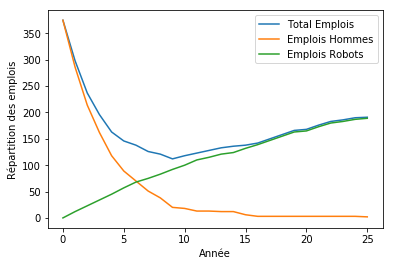

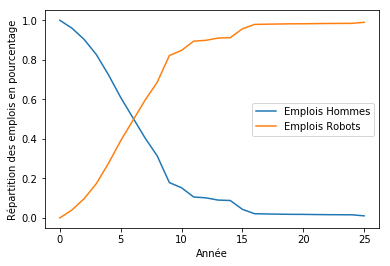

In [100]:
proba_remplace = 5
nombre_années = 25

grid_usine_7_0 = creation_remplissage_grid_hommes(lignes,colonnes)
grid_usine_7_1 = rplcmt_homme_usine_grille_n_années(grid_usine_7_0, lignes, colonnes, proba_remplace, nombre_années)
fluctuation_emplois_plot(grid_usine_7_1, nombre_années, lignes, colonnes)